In [6]:
pip install tensorflow


In [7]:
nvcc --version


NameError: name 'nvcc' is not defined

In [8]:
pip install --upgrade pip setuptools wheel


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 52.2 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 75.1.0
    Uninstalling setuptools-75.1.0:
      Successfully uninstalled setuptools-75.1.0
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.


In [1]:
pip uninstall tensorflow-gpu tensorflow -y


Found existing installation: tensorflow 2.17.1
Uninstalling tensorflow-2.17.1:
  Successfully uninstalled tensorflow-2.17.1


In [2]:
pip install tensorflow==2.12.0


INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 57.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 51.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 103.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 100.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 MB 54.2 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.0
    Uninstalling wrapt-1.17.0:
      Successfully uninstalled wrapt-1.17.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninsta

In [7]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.__version__)

Num GPUs Available:  0
2.12.0


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
df=pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
x=df.iloc[:,3:13]
y=df.iloc[:,13]

In [ ]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [13]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [14]:
pd.get_dummies(x['Geography'])

,France,Germany,Spain
0,True,False,False
1,False,False,True
2,True,False,False
3,True,False,False
4,False,False,True
...,...,...,...
9995,True,False,False
9996,True,False,False
9997,True,False,False
9998,False,True,False


In [15]:
geography=pd.get_dummies(x['Geography'],drop_first=True)
gender=pd.get_dummies(x['Gender'],drop_first=True)

In [16]:
x=x.drop(['Geography','Gender'],axis = 1)
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [17]:
x=pd.concat([x,geography,gender],axis = 1)

In [18]:
#Splitted the dataset into Training and Testing

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [19]:
#Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [20]:
x_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [21]:
x_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [22]:
x_train.shape

(8000, 11)

In [23]:
# Part 2 create the ANN

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [24]:
## Lets initialize the ANN
classifier = Sequential()

In [27]:
#adding the input Layer
classifier.add(Dense(units=11,activation='relu'))

In [26]:
#adding the first hidden Layer
classifier.add(Dense(units=7,activation='relu'))

In [28]:
#adding the second hidden Layer
classifier.add(Dense(units=6,activation='relu'))

In [29]:
#Adding the output Layer
classifier.add(Dense(1,activation='sigmoid'))

In [32]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [33]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [43]:
## Early Stopping
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [44]:
  model_history=classifier.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 4s 8ms/step - loss: 0.3092 - accuracy: 0.8712 - val_loss: 0.3743 - val_accuracy: 0.8478
Epoch 2/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3084 - accuracy: 0.8711 - val_loss: 0.3791 - val_accuracy: 0.8432
Epoch 3/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3080 - accuracy: 0.8709 - val_loss: 0.3769 - val_accuracy: 0.8459
Epoch 4/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3075 - accuracy: 0.8726 - val_loss: 0.3781 - val_accuracy: 0.8497
Epoch 5/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3058 - accuracy: 0.8714 - val_loss: 0.3776 - val_accuracy: 0.8459
Epoch 6/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3080 - accuracy: 0.8714 - val_loss: 0.3783 - val_accuracy: 0.8463
Epoch 7/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3076 - accuracy: 0.8727 - val_loss: 0.3770 - val_accuracy:

In [45]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

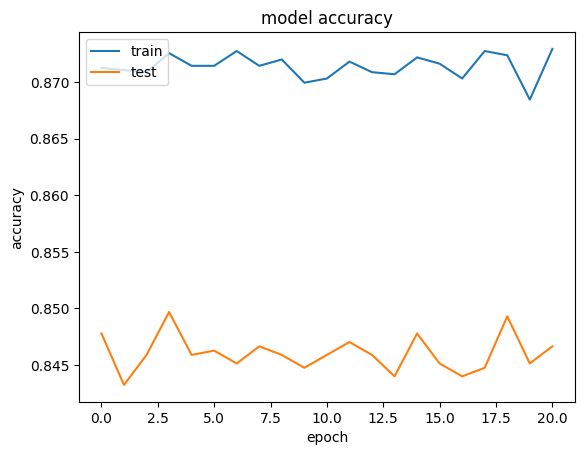

In [50]:
# summerize history for accuracy
import matplotlib.pyplot as plt

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

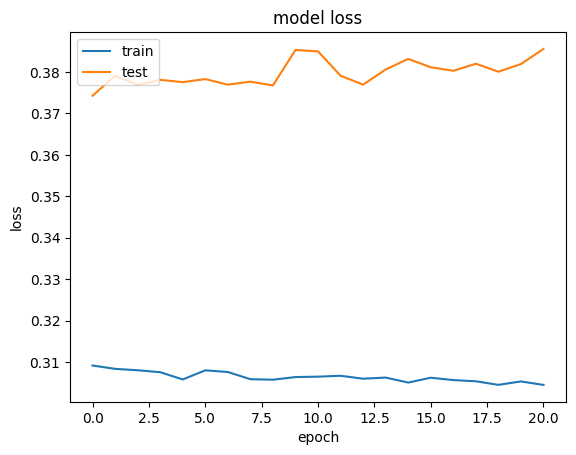

In [51]:
# summerize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [52]:
# Parrt 3 - Making the predictions and evaluating the model

#predicting the Test set results
y_pred = classifier.predict(x_test)
y_pred = (y_pred>=0.5)

63/63 [==============================] - 0s 2ms/step


In [54]:
 # make the confusion matrix
 from sklearn.metrics import confusion_matrix
 cm = confusion_matrix(y_test,y_pred)
 cm

array([[1503,   92],
       [ 214,  191]])

In [55]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [56]:
score

0.847

In [57]:
#get the weights
classifier.get_weights()

[array([[-1.60411056e-02, -1.52952179e-01, -5.94050527e-01,
         -2.63056755e-01, -1.14254514e-03, -1.68756291e-01,
          9.10433710e-01, -2.73085028e-01,  4.47569698e-01,
         -5.04286960e-02, -2.70920038e-01],
        [ 7.32146978e-01,  4.24862266e-01, -7.97762275e-01,
          9.57183897e-01, -6.09255791e-01, -9.73985910e-01,
         -4.85853553e-01,  6.78633928e-01,  2.87442625e-01,
          4.01708990e-01, -4.97102946e-01],
        [ 1.42282799e-01,  3.25536221e-01, -3.14500153e-01,
         -2.28197038e-01,  1.28713310e-01,  7.47383311e-02,
          6.03997186e-02, -4.30300385e-02, -1.38671800e-01,
          3.84074986e-01,  2.82284506e-02],
        [-1.21915914e-01, -1.12283982e-01,  9.90374833e-02,
         -5.69210231e-01, -6.07686102e-01,  2.29776323e-01,
         -3.53740185e-01,  3.16641629e-01,  1.17725350e-01,
         -6.69714987e-01, -2.36951206e-02],
        [-6.77723527e-01, -2.31021702e-01, -2.72152014e-02,
         -6.98462129e-01,  9.15371552e-02,  